# Otros algoritmos de aprendizaje

Tips and tricks para el aprendizaje

In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from tensorflow.keras import regularizers
import os

# Elegir el optimizador

Muchas veces elegir el optimizador adecuado puede cambiar significativamente el desempeño de nuestro entrenamiento



In [2]:
# Cargar la base de datos de números
digits = load_digits()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de la red neuronal
model = keras.Sequential([
    # Red de entrada
    keras.layers.Input(shape=(64,)),  # Capa de entrada con 64 características
    keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas y función de activación ReLU
    keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 neuronas para clasificar 10 clases (números del 0 al 9)
])

scce = tf.keras.losses.SparseCategoricalCrossentropy()

loss0 = scce(y_train, model.predict(X_train)).numpy()
#loss = model.evaluate(X_train, y_train)
print(f"Loss: {loss0}")

model.save_weights('modelo_base.h5')


45/45 [==============================] - 0s 2ms/step
Loss: 2.3996171951293945


In [3]:
modelos = dict()
for optimizador in ["SGD","Adagrad","Adam","Nadam"]:

    model.load_weights('modelo_base.h5')

    # Compilar el modelo
    model.compile(optimizer=optimizador, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    print(optimizador)
    # Subdividimos train para generar métricas la validación es interna
    modelos[optimizador] = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=0)



SGD
Adagrad
Adam
Nadam


In [9]:
modelos["Nadam"].history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

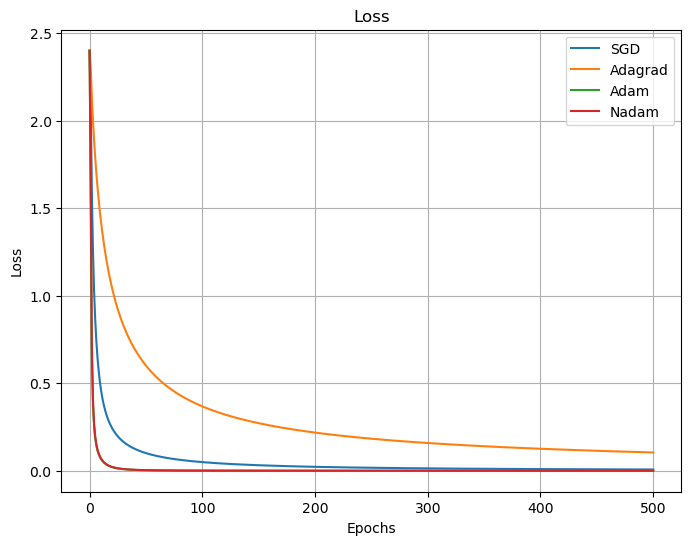

In [13]:
plt.figure(figsize=(8, 6))  # Adjust the figure size

for llave in modelos:
    #print(modelos[llave].history["loss"])
    #plt.semilogy([loss0]+modelos[llave].history["loss"], label=llave)
    plt.plot([loss0]+modelos[llave].history["loss"], label=llave)
    #plt.plot([loss0]+modelos[llave].history["val_accuracy"], label=llave)

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

# Show the plot
plt.grid(True)  # Add grid lines

# Inicializadores

podemos elegir los pesos iniciales, recordemos que queremos hacer una optimización de estos pesos. Así que si elegimos de marera correcta será mucho mas rápido.


In [15]:
from tensorflow.keras import initializers

In [16]:
modelos = dict()
inicalizadores = {
    "RandomNormal":initializers.RandomNormal(seed=2023), #Campana de Gauss (media cero, distrib normal 1)
    "RandomUniform":initializers.RandomUniform(seed=2023), # Todos los números igual de probables
    "Zeros":initializers.Zeros(),
    "Ones":initializers.Ones(),
    "GlorotNormal":initializers.GlorotNormal(seed=2023),  # Gauss transformada (media o distrib normal diferentes)
    "HeNormal":initializers.HeNormal(seed=2023),       # Gauss transformada (media o distrib normal diferentes)
}
for inicial in inicalizadores:

    model = keras.Sequential([
        keras.layers.Input(shape=(64,)),  # Capa de entrada con 64 características
        keras.layers.Dense(128, activation='relu', kernel_initializer=inicalizadores[inicial]),  # Capa oculta con 128 neuronas y función de activación ReLU
        keras.layers.Dense(10, activation='softmax', kernel_initializer=inicalizadores[inicial])  # Capa de salida con 10 neuronas para clasificar 10 clases (números del 0 al 9)
    ])

    # Compilar el modelo
    model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    print(inicial)
    modelos[inicial] = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)



RandomNormal
RandomUniform
Zeros
Ones
GlorotNormal
HeNormal


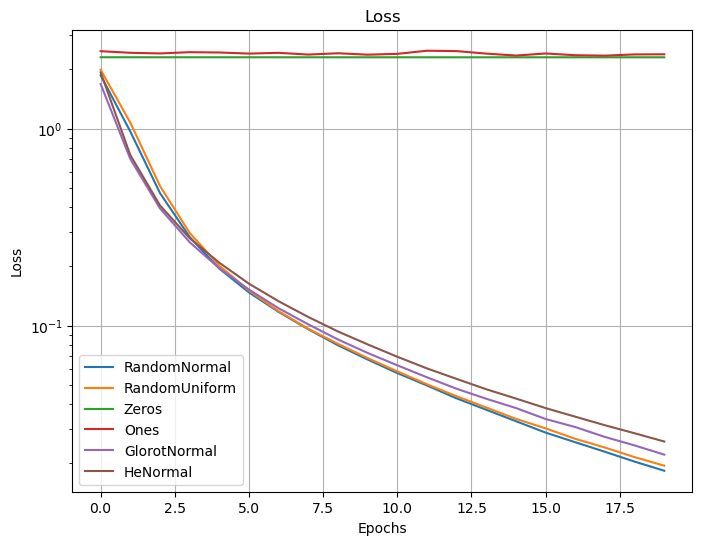

In [19]:
plt.figure(figsize=(8, 6))  # Adjust the figure size

for llave in modelos:
    plt.semilogy(modelos[llave].history["loss"], label=llave)
    #plt.plot(modelos[llave].history["loss"], label=llave)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.grid(True)

# Entrenamiento en GPU

Las siguientes secciones tendran un entrenamiento mas serio lo cual puede requerir algo de tiempo. Por lo que haremos uso de las GPU que nos da colab

In [3]:
# correr en colab
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: GPU device not found

# Dropout

Es una técnica de regularización que se aplica durante el entrenamiento de una red neuronal. Durante cada paso de entrenamiento, se apaga (desactiva) de forma aleatoria un conjunto de neuronas en una capa, lo que significa que sus salidas se establecen en cero. Esto se hace independientemente para cada neurona y en cada paso de entrenamiento.



![esquema dropout](https://i.stack.imgur.com/CewjH.png)


Es eficaz para reducir el sobreajuste. Al apagar las neuronas, se evita que la red se vuelva demasiado dependiente de características específicas o conexiones, lo que mejora la generalización del modelo a datos no vistos.

## Ejemplo


In [26]:
X, y = make_moons(n_samples=200, noise=0.3, random_state=123)

In [5]:
#from sklearn import datasets

#X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

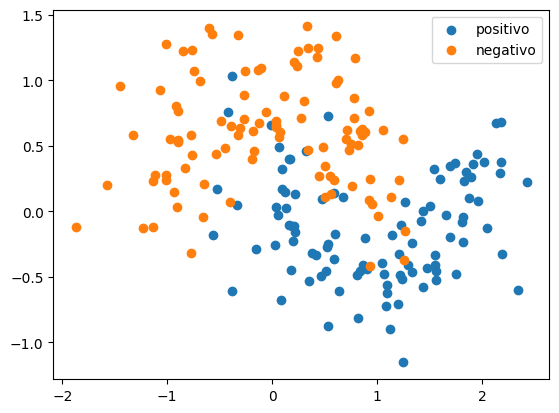

In [27]:
plt.scatter(X[y==1,0],X[y==1,1],label="positivo")
plt.scatter(X[y==0,0],X[y==0,1],label="negativo")
plt.legend()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [28]:
modelo_simple = keras.Sequential()  # red hacia adelante
modelo_simple.add(keras.layers.Dense(500, input_dim=2, activation='relu')) #Una capa oculta de 500 neur entrada dos neuronas
modelo_simple.add(keras.layers.Dense(1, activation='sigmoid')) # Una salida
modelo_simple.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_simple = modelo_simple.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)


Epoch 1/1000
5/5 [==============================] - 1s 64ms/step - loss: 0.7155 - accuracy: 0.4786 - val_loss: 0.6689 - val_accuracy: 0.6667
Epoch 2/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.6581 - accuracy: 0.7357 - val_loss: 0.6154 - val_accuracy: 0.8333
Epoch 3/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.6097 - accuracy: 0.8143 - val_loss: 0.5713 - val_accuracy: 0.8000
Epoch 4/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.5722 - accuracy: 0.7786 - val_loss: 0.5331 - val_accuracy: 0.8000
Epoch 5/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.5372 - accuracy: 0.7857 - val_loss: 0.4998 - val_accuracy: 0.8000
Epoch 6/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.5094 - accuracy: 0.7786 - val_loss: 0.4699 - val_accuracy: 0.8000
Epoch 7/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4853 - accuracy: 0.7857 - val_loss: 0.4440 - val_accuracy: 0.8167
Epoch 8/1000


In [4]:
plt.plot(history_simple.history['loss'], label='train')
plt.plot(history_simple.history['val_loss'], label='validacion')
plt.legend()

# Si loss baja pero val loss sube es sobreajuste

NameError: name 'history_simple' is not defined

In [30]:
X1_min = X[:, 0].min() - 0.1
X1_max = X[:, 0].max() + 0.1
X2_min = X[:, 1].min() - 0.1
X2_max = X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(X1_min, X1_max, 100), np.linspace(X2_min, X2_max, 100))


313/313 [==============================] - 1s 2ms/step


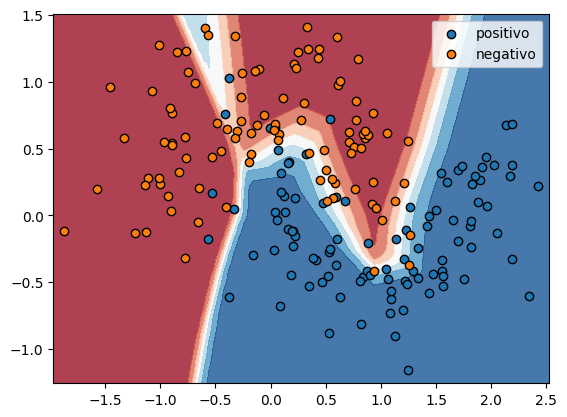

In [31]:

Z = modelo_simple.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

plt.scatter(X[y==1,0],X[y==1,1],label="positivo", edgecolor='k')
plt.scatter(X[y==0,0],X[y==0,1],label="negativo", edgecolor='k')
plt.legend()


In [32]:
# Mismo modelo pero con dropout
modelo_drop = keras.Sequential()
modelo_drop.add(keras.layers.Dense(500, input_dim=2, activation='relu'))
modelo_drop.add(keras.layers.Dropout(0.4)) #0.4 cantidad en porcentaje de neuronas a desactivar
modelo_drop.add(keras.layers.Dense(1, activation='sigmoid'))
modelo_drop.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  #Its just a method which does configuration

In [33]:
#with tf.device('/device:GPU:0'):
history_drop = modelo_drop.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

Epoch 1/1000
5/5 [==============================] - 1s 46ms/step - loss: 0.6549 - accuracy: 0.7714 - val_loss: 0.6176 - val_accuracy: 0.8000
Epoch 2/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.6020 - accuracy: 0.7929 - val_loss: 0.5739 - val_accuracy: 0.8000
Epoch 3/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.5728 - accuracy: 0.7857 - val_loss: 0.5362 - val_accuracy: 0.8000
Epoch 4/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.5448 - accuracy: 0.7786 - val_loss: 0.5050 - val_accuracy: 0.8000
Epoch 5/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.5117 - accuracy: 0.7786 - val_loss: 0.4773 - val_accuracy: 0.8167
Epoch 6/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.4931 - accuracy: 0.7786 - val_loss: 0.4527 - val_accuracy: 0.8167
Epoch 7/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.4703 - accuracy: 0.7857 - val_loss: 0.4318 - val_accuracy: 0.8167
Epoch 8/1000
5

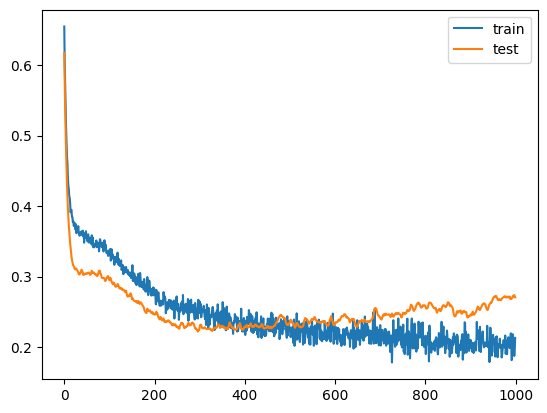

In [34]:
plt.plot(history_drop.history['loss'], label='train')
plt.plot(history_drop.history['val_loss'], label='test')
plt.legend()

313/313 [==============================] - 1s 2ms/step


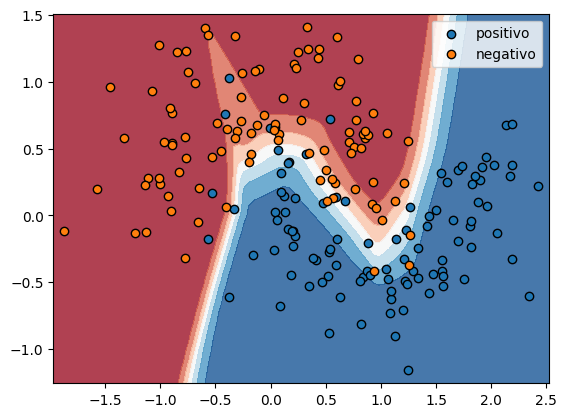

In [35]:

Z = modelo_drop.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

plt.scatter(X[y==1,0],X[y==1,1],label="positivo", edgecolor='k')
plt.scatter(X[y==0,0],X[y==0,1],label="negativo", edgecolor='k')
plt.legend()


# Reglularización L1 y L2


Estas técnicas añaden una penalizacióon a la función de pérdida.

Ayudan a prevenir el sobreajuste (overfitting) y mejorar la generalización del modelo al penalizar los valores extremos de los pesos de las conexiones entre neuronas en una red neuronal.

## Reglularización L1

$$Loss_{L1} = Loss_{original} + \lambda \sum |w_i| $$

Donde:

- $Loss_{original}$ es la función de pérdida original del modelo.
- $\lambda$ es un hiperparámetro de regularización que controla la fuerza de la penalización.
- $w_i$ son los pesos de las conexiones en la red.


Con la regularización L1 algunos pesos son forzados a ser exactamente cero. Esto hace que la red sea más robusta y puede llevar a una selección automática de características, ya que algunos pesos se vuelven irrelevantes para la tarea y se anulan.

## Reglularización L2

$$Loss_{L2} = Loss_{original} + \lambda \sum (w_i^2) $$

Donde:

- $Loss_{original}$ es la función de pérdida original del modelo.
- $\lambda$ es un hiperparámetro de regularización que controla la fuerza de la penalización.
- $w_i$ son los pesos de las conexiones en la red.

La regularización L2 tiende a generar pesos más pequeños. Es útil cuando se desea mantener todas las características en el modelo pero evitar que los pesos se vuelvan demasiado grandes, lo que puede llevar al sobreajuste.


In [36]:
# regularizers.L1
# regularizers.L2
# regularizers.L1L2
modelo_L2 = keras.Sequential()
modelo_L2 = keras.Sequential()
modelo_L2.add(
    keras.layers.Dense(
        500,
        input_dim=2,
        activation='relu',
        kernel_regularizer=regularizers.L2(1e-4),  # en que tipo de parte tener la regularización (kerne pesos normales)
        bias_regularizer=regularizers.L2(1e-4) # bias (el número es el lambda de la formula que tan pesado es el castigo por tener pesos grandes)
    ))
modelo_L2.add(
    keras.layers.Dense(
        1,
        activation='sigmoid',
        kernel_regularizer=regularizers.L2(1e-4),
        bias_regularizer=regularizers.L2(1e-4)
        ))
modelo_L2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
modelo_L2 = keras.Sequential()
modelo_L2 = keras.Sequential()
modelo_L2.add(
    keras.layers.Dense(
        500,
        input_dim=2,
        activation='relu',
        kernel_regularizer=regularizers.L2(1e-3),
        bias_regularizer=regularizers.L2(1e-3)
    ))
modelo_L2.add(
    keras.layers.Dense(
        1,
        activation='sigmoid',
        kernel_regularizer=regularizers.L2(1e-3),
        bias_regularizer=regularizers.L2(1e-3)
        ))
modelo_L2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_L2 = modelo_L2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

Epoch 1/1000
5/5 [==============================] - 3s 83ms/step - loss: 0.6819 - accuracy: 0.7286 - val_loss: 0.6402 - val_accuracy: 0.8667
Epoch 2/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.6298 - accuracy: 0.8214 - val_loss: 0.5917 - val_accuracy: 0.8167
Epoch 3/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.5888 - accuracy: 0.7929 - val_loss: 0.5498 - val_accuracy: 0.8167
Epoch 4/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.5504 - accuracy: 0.7857 - val_loss: 0.5151 - val_accuracy: 0.8167
Epoch 5/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.5219 - accuracy: 0.7857 - val_loss: 0.4834 - val_accuracy: 0.8167
Epoch 6/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.4964 - accuracy: 0.7929 - val_loss: 0.4558 - val_accuracy: 0.8167
Epoch 7/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.4755 - accuracy: 0.7929 - val_loss: 0.4315 - val_accuracy: 0.8167
Epoch 8/1000


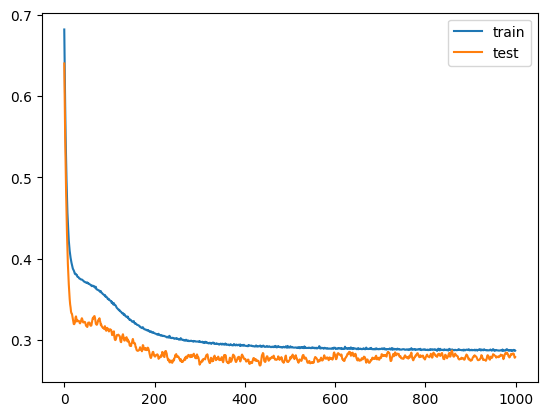

In [41]:
plt.plot(history_L2.history['loss'], label='train')
plt.plot(history_L2.history['val_loss'], label='test')
plt.legend()

# Data Augmentation

Se utiliza para, como su nomnbre lo dice aumentar la cantidad de datos de entrenamiento mediante la aplicación de transformaciones y perturbaciones a los datos existentes. El objetivo principal es mejorar la generalización del modelo al exponerlo a una mayor variabilidad en los datos de entrenamiento.


Ejemplos de Transformaciones en Data Augmentation: Rotación, Traslación, Inversión, Corte Aleatorio, Aumento de Brillo/Contraste.


Edit: Un caso de uso es en reconocimiento de imágenes, en la que si rotas una imagen de un gato sigue siendo un gato, hay datos en los que agregar ruido sigue siendo de la misma categoría, hay datos que no

## Ejemplo

Ekemplo tomado de [Image classification from scratch](https://keras.io/examples/vision/image_classification_from_scratch/)

In [42]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
!unzip -q kagglecatsanddogs_5340.zip
!ls
!ls PetImages


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0  72.5M      0  0:00:10  0:00:10 --:--:-- 68.8M
 CDLA-Permissive-2.0.pdf      PetImages        sample_data
 kagglecatsanddogs_5340.zip  'readme[1].txt'
Cat  Dog


In [43]:
num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 1590 images


In [44]:
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Using 4682 files for validation.


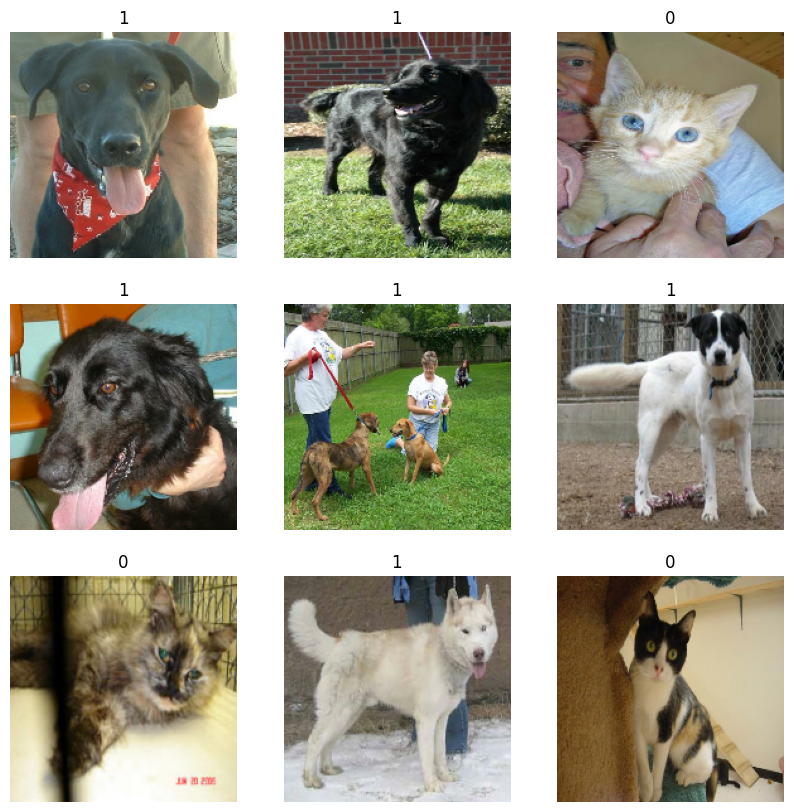

In [45]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [47]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
    ]
)

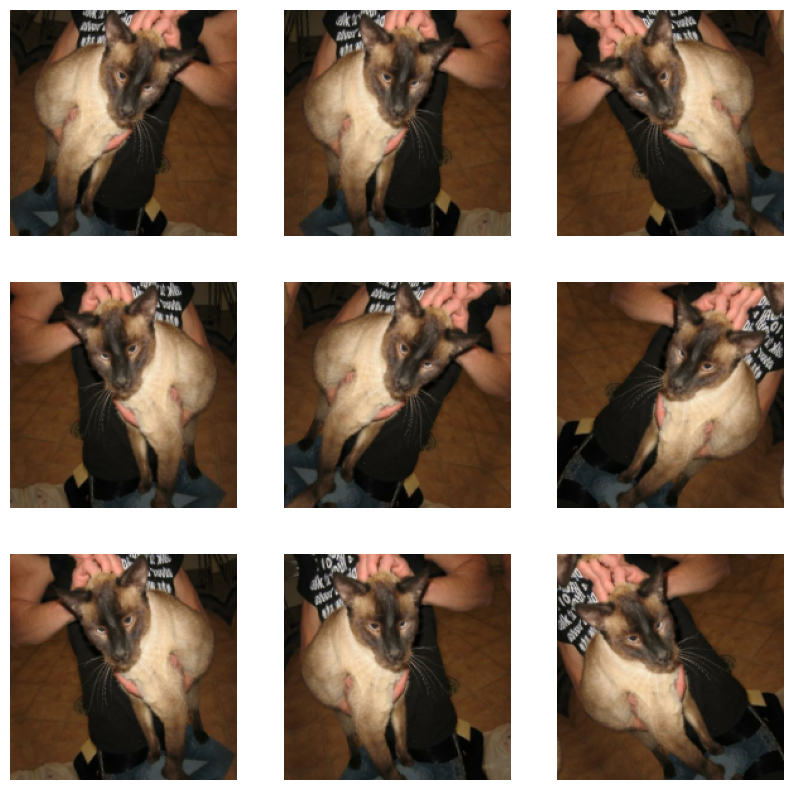

In [48]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [49]:
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y))

In [50]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

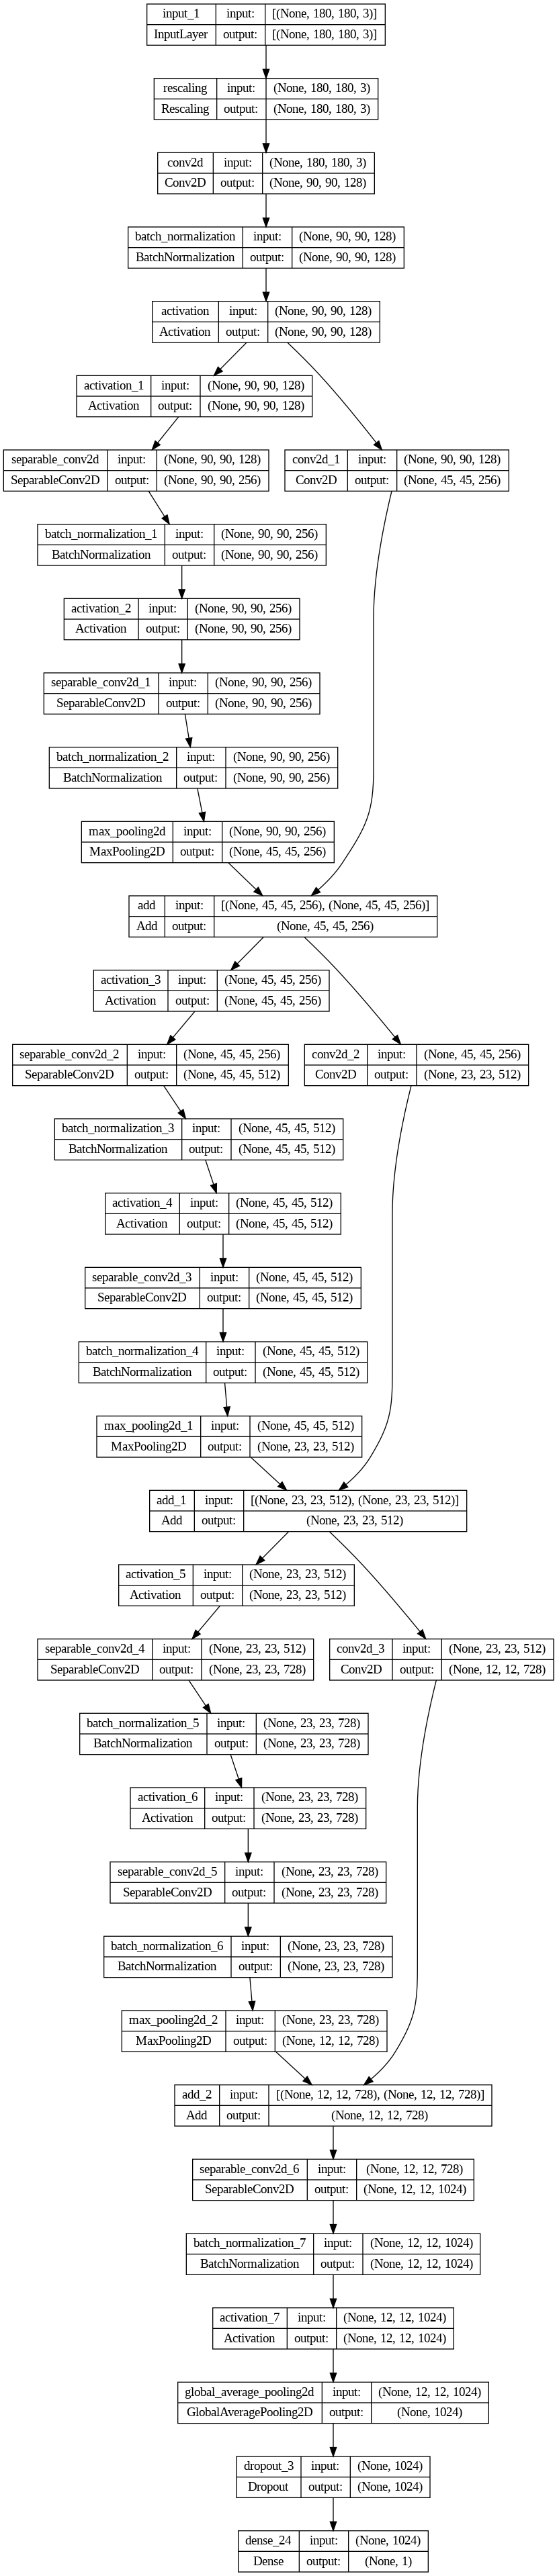

In [51]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = keras.layers.Rescaling(1.0 / 255)(inputs)
    x = keras.layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = keras.layers.Activation("relu")(x)
        x = keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = keras.layers.BatchNormalization()(x)

        x = keras.layers.Activation("relu")(x)
        x = keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = keras.layers.BatchNormalization()(x)

        x = keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = keras.layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = keras.layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = keras.layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)

    x = keras.layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [52]:
epochs = 10

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/25
147/147 [==============================] - 266s 2s/step - loss: 0.6410 - accuracy: 0.6460 - val_loss: 0.8120 - val_accuracy: 0.4957
Epoch 2/25
147/147 [==============================] - 231s 2s/step - loss: 0.4970 - accuracy: 0.7569 - val_loss: 1.4800 - val_accuracy: 0.4957
Epoch 3/25
147/147 [==============================] - 228s 2s/step - loss: 0.3859 - accuracy: 0.8288 - val_loss: 1.8089 - val_accuracy: 0.4957
Epoch 4/25
147/147 [==============================] - 229s 2s/step - loss: 0.3188 - accuracy: 0.8654 - val_loss: 1.0359 - val_accuracy: 0.5854
Epoch 5/25
147/147 [==============================] - 228s 2s/step - loss: 0.2660 - accuracy: 0.8871 - val_loss: 0.2517 - val_accuracy: 0.8953
Epoch 6/25
147/147 [==============================] - 234s 2s/step - loss: 0.2350 - accuracy: 0.9031 - val_loss: 0.2613 - val_accuracy: 0.8932
Epoch 7/25
147/147 [==============================] - 234s 2s/step - loss: 0.2020 - accuracy: 0.9175 - val_loss: 1.3955 - val_accuracy: 0.6230

1/1 [==============================] - 1s 632ms/step
This image is 68.16% cat and 31.84% dog.


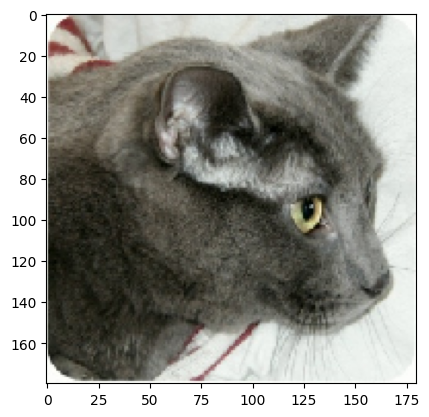

In [53]:
img = keras.utils.load_img(
    "PetImages/Cat/6779.jpg", target_size=image_size
)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")